# IMPORT REQUIRED PACKAGES

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# LOADING THE DATASET

In [63]:
df = pd.read_csv("C:\\Users\91995\Downloads\milknew.csv")
df

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# EXPLORATORY DATA ANALYSIS(EDA)

In [64]:
df.shape

(1059, 8)

In [65]:
df.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [66]:
df.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
pH             1059 non-null float64
Temperature    1059 non-null int64
Taste          1059 non-null int64
Odor           1059 non-null int64
Fat            1059 non-null int64
Turbidity      1059 non-null int64
Colour         1059 non-null int64
Grade          1059 non-null object
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [68]:
df.dtypes

pH             float64
Temperature      int64
Taste            int64
Odor             int64
Fat              int64
Turbidity        int64
Colour           int64
Grade           object
dtype: object

In [69]:
df["Grade"].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [70]:
df["pH"].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
8.1     24
9.5     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [77]:
gk= df.groupby('Temperature')
gk.first()

,pH,Taste,Odor,Fat,Turbidity,Colour,Grade
Temperature,,,,,,,
34,9.5,1,1,0,1,255,low
35,6.6,1,0,1,0,254,high
36,6.6,0,1,0,1,253,high
37,6.6,0,0,0,0,255,medium
38,6.5,1,0,0,0,255,medium
40,3.0,1,1,1,1,255,low
41,6.7,1,0,0,0,247,medium
42,6.8,1,1,1,1,255,high
43,9.0,1,0,1,1,250,low


In [78]:
df["Temperature"].value_counts()

45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temperature, dtype: int64

In [79]:
df["Colour"].value_counts()

255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: Colour, dtype: int64

# DATA VISUALIZATION

(array([256.,   0.,   0.,   0.,   0., 429.,   0.,   0.,   0., 374.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

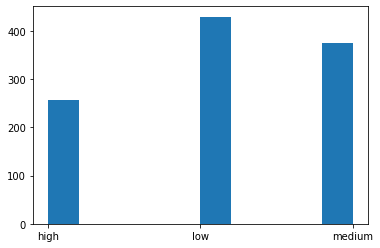

In [80]:
plt.hist(df["Grade"])

(array([ 32.,   0.,   0., 115.,  92.,  23., 146.,   0.,  22., 629.]),
 array([240. , 241.5, 243. , 244.5, 246. , 247.5, 249. , 250.5, 252. ,
        253.5, 255. ]),
 <a list of 10 Patch objects>)

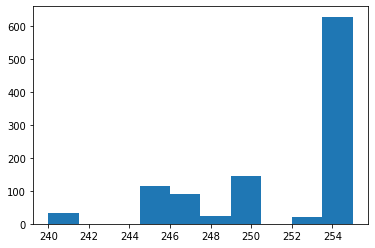

In [81]:
plt.hist(df["Colour"])

(array([391., 459.,  58.,  48.,  18.,  46.,  22.,   0.,   0.,  17.]),
 array([34. , 39.6, 45.2, 50.8, 56.4, 62. , 67.6, 73.2, 78.8, 84.4, 90. ]),
 <a list of 10 Patch objects>)

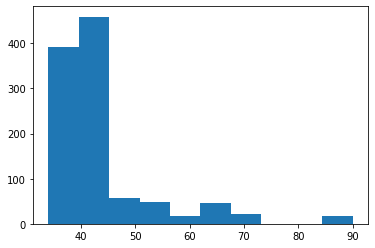

In [84]:
plt.hist(df["Temperature"])

(array([480.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 579.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

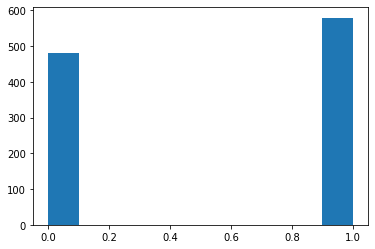

In [85]:
plt.hist(df["Taste"])

(array([601.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 458.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

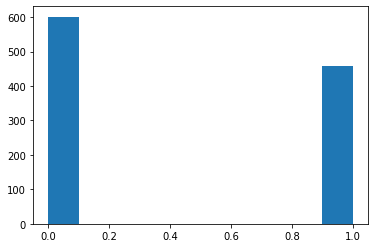

In [86]:
plt.hist(df["Odor"])

(array([ 70.,   0.,  57.,  23.,  19., 680.,  39.,  24.,  62.,  85.]),
 array([3.  , 3.65, 4.3 , 4.95, 5.6 , 6.25, 6.9 , 7.55, 8.2 , 8.85, 9.5 ]),
 <a list of 10 Patch objects>)

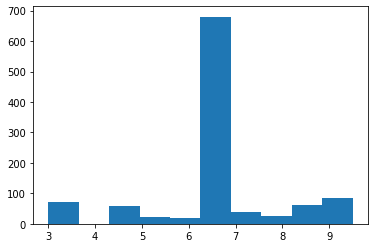

In [87]:
plt.hist(df["pH"])

(array([539.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 520.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

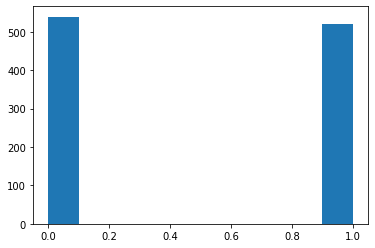

In [88]:
plt.hist(df["Turbidity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da0e6a3708>,
 'caps': [<matplotlib.lines.Line2D at 0x1da0e6a3d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da0e69cec8>],
 'medians': [<matplotlib.lines.Line2D at 0x1da0e6aad88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da0e6aae48>],
 'means': []}

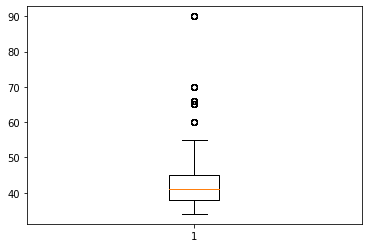

In [91]:
plt.boxplot(df["Temperature"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da0e6f8dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1da0e704fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da0e704748>],
 'medians': [<matplotlib.lines.Line2D at 0x1da0e707f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da0e70f9c8>],
 'means': []}

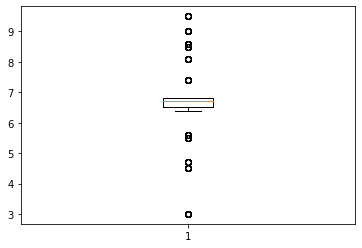

In [92]:
plt.boxplot(df["pH"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da0e769bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1da0e769d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da0e769408>],
 'medians': [<matplotlib.lines.Line2D at 0x1da0e76edc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da0e76ee48>],
 'means': []}

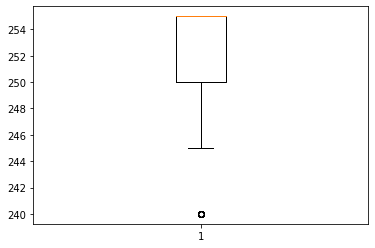

In [93]:
plt.boxplot(df["Colour"])

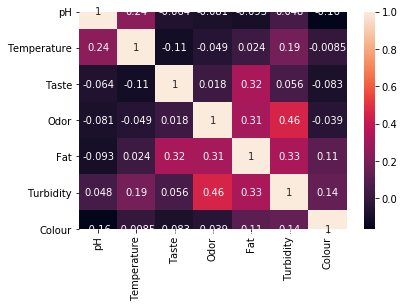

In [94]:
cor=df.corr()
sns.heatmap(cor,annot=True)

(array([348.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 711.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

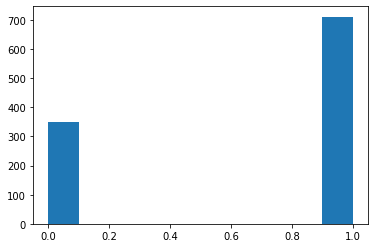

In [95]:
plt.hist(df["Fat"])

# Splitting the data into Train and Test sets

In [96]:
x = df.iloc[:,[0,1,2,3,4,5,6]]
y = df.iloc[:,7]

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [98]:
x_train

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
661,6.5,38,1,0,0,0,255
37,7.4,65,0,0,0,0,255
969,6.7,45,1,1,0,0,247
158,6.7,45,1,1,0,0,247
40,6.8,38,0,0,0,0,255
...,...,...,...,...,...,...,...
1033,6.6,38,0,0,0,0,255
763,5.6,50,0,1,1,1,255
835,4.7,38,1,0,1,0,255
559,9.0,43,1,0,1,1,250


In [99]:
y_train

661     medium
37         low
969     medium
158     medium
40      medium
         ...  
1033    medium
763        low
835        low
559        low
684     medium
Name: Grade, Length: 794, dtype: object

In [100]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(794, 7)
(794,)
(265, 7)
(265,)


# Build a model

In [101]:
model = tree.DecisionTreeClassifier()

In [102]:
mymodel = model.fit(x_train,y_train)

In [103]:
pred_y  = mymodel.predict(x_test)
pred_y

array(['high', 'low', 'medium', 'low', 'high', 'medium', 'low', 'high',
       'high', 'medium', 'low', 'high', 'medium', 'medium', 'high',
       'medium', 'high', 'high', 'high', 'low', 'high', 'low', 'medium',
       'high', 'high', 'low', 'high', 'high', 'low', 'medium', 'high',
       'low', 'low', 'medium', 'high', 'high', 'low', 'medium', 'high',
       'low', 'high', 'medium', 'high', 'low', 'medium', 'low', 'high',
       'low', 'medium', 'low', 'high', 'medium', 'medium', 'medium',
       'low', 'medium', 'medium', 'low', 'medium', 'low', 'medium', 'low',
       'medium', 'high', 'low', 'medium', 'low', 'medium', 'medium',
       'high', 'high', 'medium', 'medium', 'high', 'medium', 'medium',
       'medium', 'low', 'high', 'medium', 'low', 'medium', 'medium',
       'low', 'medium', 'medium', 'high', 'low', 'low', 'low', 'medium',
       'high', 'medium', 'low', 'high', 'medium', 'low', 'high', 'medium',
       'medium', 'high', 'medium', 'low', 'medium', 'high', 'high',
   

In [104]:
pred_y.shape

(265,)

In [105]:
y_test.shape

(265,)

In [106]:
accuracy_score(pred_y,y_test)

0.9924528301886792

In [108]:
mymodel.predict([[3,35,1,1,1,1,254]])

array(['low'], dtype=object)

In [109]:
mymodel.predict([[6.3,36,0,1,1,1,255]])

array(['high'], dtype=object)

In [111]:
df["Temperature"].min()

34

In [112]:
df["Temperature"].max()

90

In [113]:
df["pH"].min()

3.0

In [114]:
df["pH"].max()

9.5

In [172]:
df["Temperature"].value_counts()

45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temperature, dtype: int64

In [173]:
df["pH"].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
8.1     24
9.5     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [174]:
df.groupby("Grade")['Temperature'].min()

Grade
high      35
low       34
medium    34
Name: Temperature, dtype: int64

In [175]:
df.groupby("Grade").min()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
Grade,,,,,,,
high,6.5,35,0,0,0,0,245
low,3.0,34,0,0,0,0,245
medium,6.4,34,0,0,0,0,240


In [176]:
df.groupby('Grade').max()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
Grade,,,,,,,
high,6.8,45,1,1,1,1,255
low,9.5,90,1,1,1,1,255
medium,6.8,45,1,1,1,1,255
